<a href="https://colab.research.google.com/github/meryemtetik/DL_Assignments/blob/master/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/MyDrive/Colab_Notebooks&Files/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [ ]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000,0.004,0.006,0.001,-0.006,-0.009,0.007,0.001,0.012,-0.006,-0.017
CustomerId,0.004,1.000,0.005,0.009,-0.015,-0.012,0.017,-0.014,0.002,0.015,-0.006
CreditScore,0.006,0.005,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,0.001,0.009,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,-0.006,-0.015,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,-0.009,-0.012,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.007,0.017,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,0.001,-0.014,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.012,0.002,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.006,0.015,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012


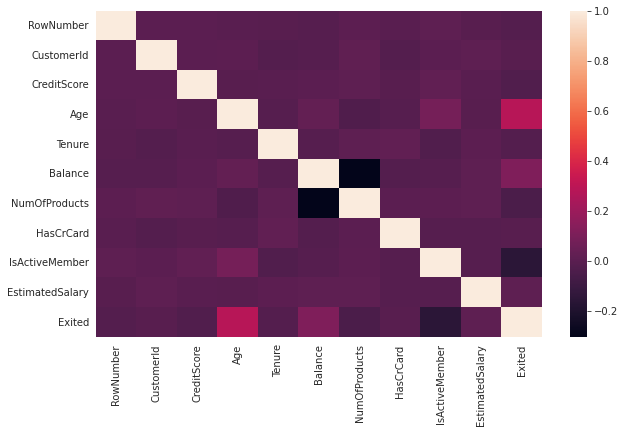

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.drop(df[["RowNumber","CustomerId", "Surname"]], axis=1,inplace=True)
#The columns 'RowNumber', 'Surname' and 'CustomerId' make the dataset unique,so we drop them.

CreditScore

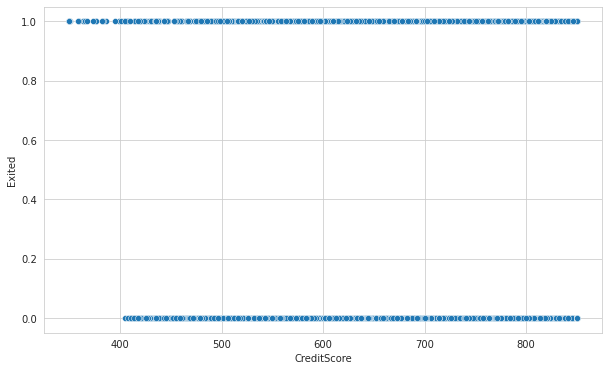

In [ ]:
sns.scatterplot(x = 'CreditScore', y = 'Exited', data = df);

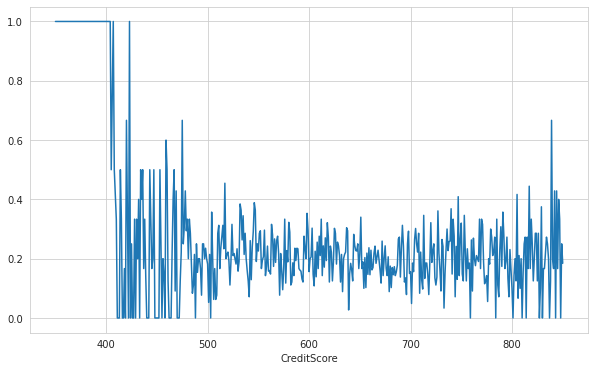

In [ ]:
df.groupby('CreditScore')['Exited'].mean().plot();

Geography

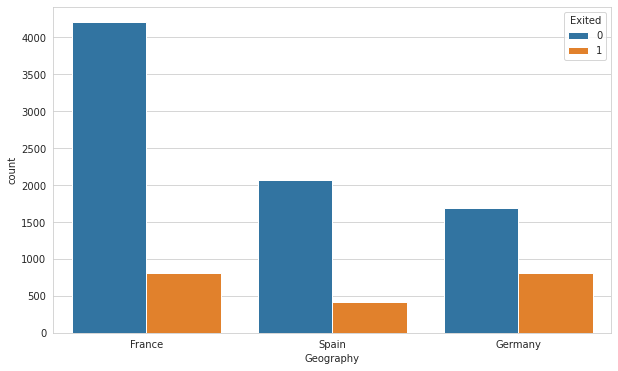

In [ ]:
sns.countplot(x='Geography', data=df, hue='Exited');

Gender

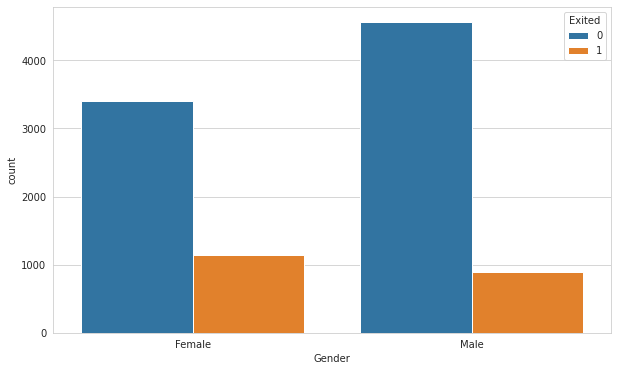

In [ ]:
sns.countplot(x='Gender', data=df, hue='Exited');

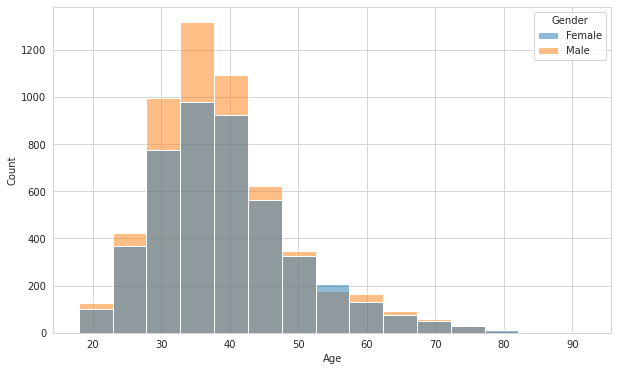

In [ ]:
sns.histplot(x='Age', data=df, hue='Gender', bins=15);

Age

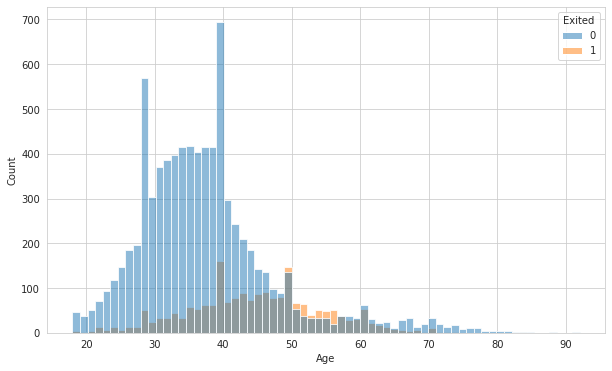

In [ ]:
sns.histplot(x='Age', data=df, hue='Exited');

Tenure

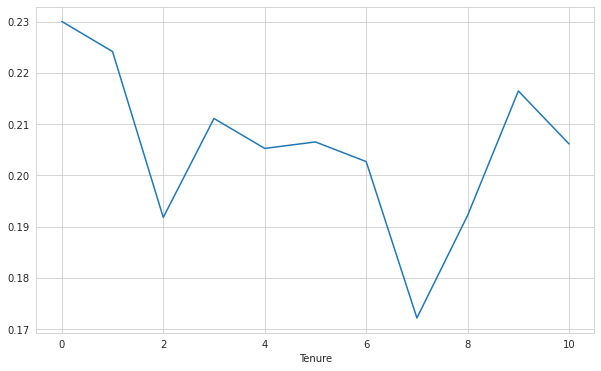

In [ ]:
df.groupby('Tenure')['Exited'].mean().plot();

Balance

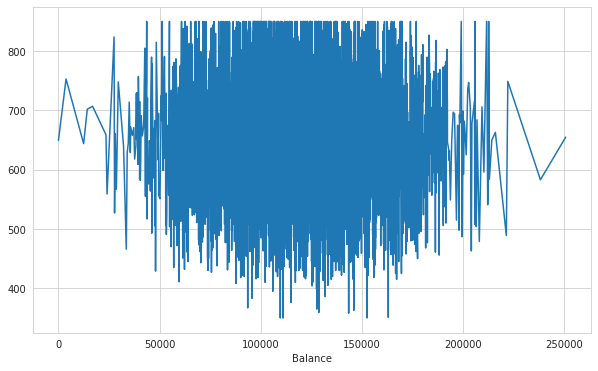

In [ ]:
df.groupby('Balance')['CreditScore'].mean().plot();

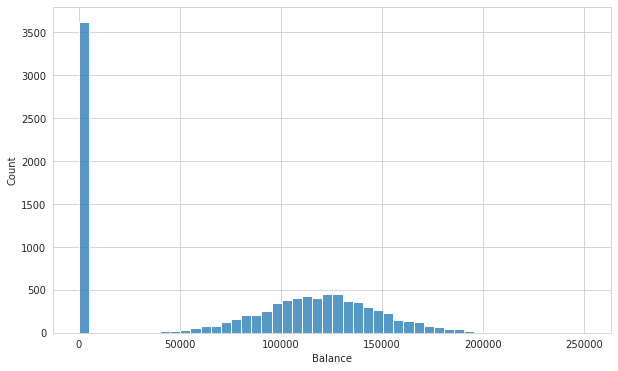

In [ ]:
sns.histplot(data=df, x= 'Balance', bins=50)

NumOfProducts

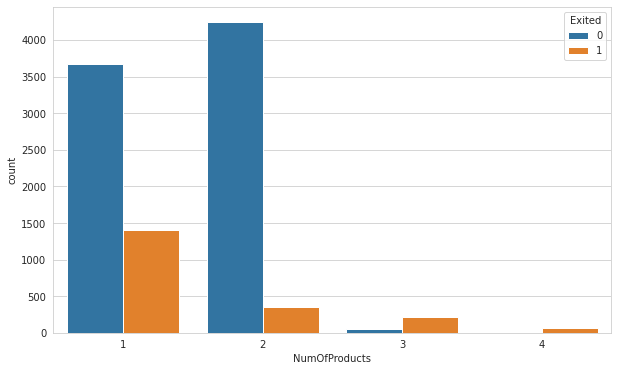

In [ ]:
sns.countplot(x='NumOfProducts', data=df, hue='Exited');

HasCrCard

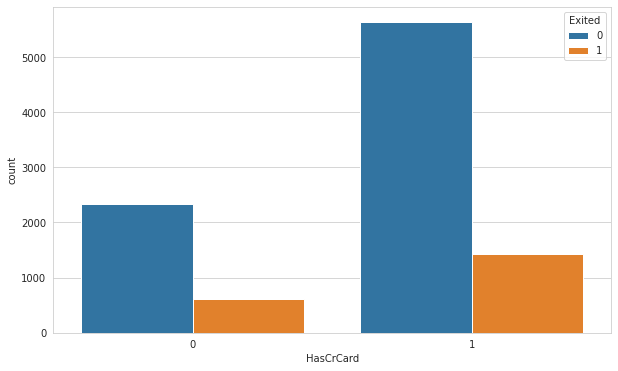

In [ ]:
sns.countplot(x='HasCrCard', data=df, hue='Exited');

IsActiveMember

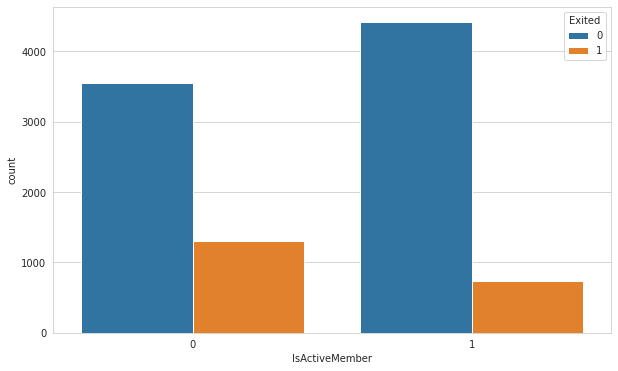

In [ ]:

sns.countplot(x='IsActiveMember', data=df, hue='Exited');

EstimatedSalary

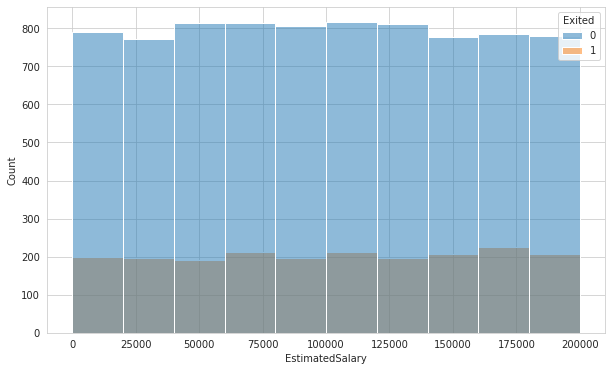

In [ ]:
sns.histplot(x='EstimatedSalary', data=df, hue='Exited', bins=10);

Exited

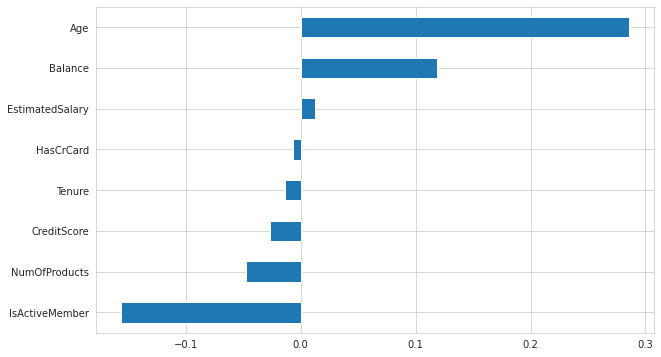

In [ ]:
df.corr()['Exited'].sort_values().drop('Exited').plot(kind='barh');

latest data

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.shape

(10000, 11)

In [ ]:
df_dummy = pd.get_dummies(df)

In [ ]:
df_dummy

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,1,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,1,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,1,0,0,1,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,0,1,0,0,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_dummy.drop('Exited', axis=1)
y = df_dummy['Exited']

In [ ]:
seed = 101

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [ ]:
X_train.shape

(9000, 13)

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                336       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 6)                 78        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 24) dtype=float32, numpy=
 array([[-0.02132508, -0.18978006, -0.39214697, -0.2120231 , -0.00290996,
          0.22927028,  0.39074427,  0.16579318, -0.09731191, -0.2254339 ,
          0.17214185,  0.30629498,  0.28991312, -0.08300754, -0.03437614,
         -0.16986065,  0.32752526,  0.10293704,  0.06996164, -0.3143922 ,
         -0.07423446,  0.2782297 ,  0.37370306, -0.25379276],
        [-0.09309372,  0.05344328,  0.1927054 ,  0.31424886, -0.38234207,
          0.08362901,  0.33936864,  0.04814604,  0.12360501,  0.05360678,
          0.39713258,  0.22406632, -0.25525433,  0.03469029, -0.39691377,
          0.19164437, -0.36822933, -0.10041678, -0.10698786,  0.32629484,
          0.10298091,  0.38576704, -0.205945  ,  0.25608355],
        [ 0.25476974, -0.04052719, -0.19430095, -0.22013533, -0.02836472,
         -0.3157755 ,  0.05592141,  0.01151183, -0.0684447 ,  0.05352998,
          0.01901489, -0.2835684 , -0.32421947, -0.0771687 , -0.2869

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 1000)

Epoch 1/1000
60/60 [==============================] - 1s 5ms/step - loss: 0.1703 - val_loss: 0.1495
Epoch 2/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.1534 - val_loss: 0.1457
Epoch 3/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.1496 - val_loss: 0.1427
Epoch 4/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.1463 - val_loss: 0.1391
Epoch 5/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.1428 - val_loss: 0.1357
Epoch 6/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.1395 - val_loss: 0.1332
Epoch 7/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.1368 - val_loss: 0.1309
Epoch 8/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.1349 - val_loss: 0.1291
Epoch 9/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.1326 - val_loss: 0.1276
Epoch 10/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.1303 - val_loss: 0.1248

In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 24) dtype=float32, numpy=
 array([[ 1.36658490e-01, -5.01868963e-01, -4.49718297e-01,
         -5.48867695e-02,  2.03640759e-01,  3.69978905e-01,
          4.82093215e-01, -5.92358150e-02,  7.95303881e-02,
         -1.33922592e-01,  8.31673071e-02,  1.60819888e-01,
          7.00177014e-01, -6.96015507e-02,  6.19926602e-02,
         -7.24473059e-01,  3.61488223e-01,  3.73155177e-02,
          2.61703432e-01, -4.41326797e-01,  4.58937943e-01,
          1.85023874e-01,  8.17883193e-01, -9.07387286e-02],
        [-1.05302386e-01,  1.45805523e-01,  3.59770924e-01,
          9.07888170e-03, -1.12162685e+00, -3.10891926e-01,
          1.14034617e+00,  7.80073702e-01, -3.78069580e-02,
          1.47775695e-01,  3.78491282e-01,  7.85096407e-01,
         -6.65524423e-01,  7.16371238e-01, -9.68103945e-01,
          4.17103529e-01, -1.32062519e+00, -2.64098674e-01,
         -6.20917618e-01,  1.07197320e+00, -2.51106530e-01,
          7.74505854e-01, -2.29

In [ ]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.170,0.150
1,0.153,0.146
2,0.150,0.143
3,0.146,0.139
4,0.143,0.136
...,...,...
995,0.072,0.151
996,0.071,0.154
997,0.070,0.159
998,0.073,0.152


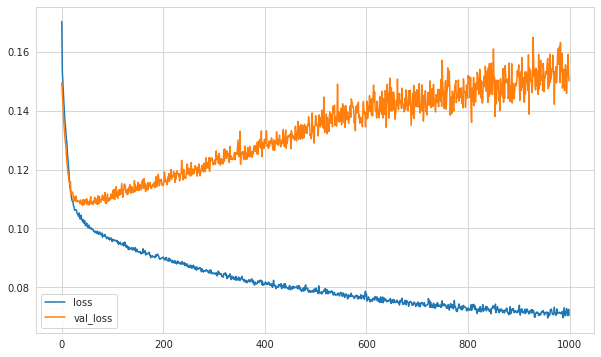

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

0.14277535676956177

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.14238211770040266 
mae: 0.22156019036471844 
mse: 0.1427753674273547 
rmse: 0.3778562787983742


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [ ]:
model = Sequential()

tf.random.set_seed(seed)

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer = 'adam', 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6272651240591023, 1: 2.4644030668127055}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

opt = Adam(lr = 0.003) # default learning rate value is 0.001
model.compile(optimizer = opt, loss = 'mse')

In [ ]:
model.weights

[<tf.Variable 'dense_8/kernel:0' shape=(13, 24) dtype=float32, numpy=
 array([[-0.02132508, -0.18978006, -0.39214697, -0.2120231 , -0.00290996,
          0.22927028,  0.39074427,  0.16579318, -0.09731191, -0.2254339 ,
          0.17214185,  0.30629498,  0.28991312, -0.08300754, -0.03437614,
         -0.16986065,  0.32752526,  0.10293704,  0.06996164, -0.3143922 ,
         -0.07423446,  0.2782297 ,  0.37370306, -0.25379276],
        [-0.09309372,  0.05344328,  0.1927054 ,  0.31424886, -0.38234207,
          0.08362901,  0.33936864,  0.04814604,  0.12360501,  0.05360678,
          0.39713258,  0.22406632, -0.25525433,  0.03469029, -0.39691377,
          0.19164437, -0.36822933, -0.10041678, -0.10698786,  0.32629484,
          0.10298091,  0.38576704, -0.205945  ,  0.25608355],
        [ 0.25476974, -0.04052719, -0.19430095, -0.22013533, -0.02836472,
         -0.3157755 ,  0.05592141,  0.01151183, -0.0684447 ,  0.05352998,
          0.01901489, -0.2835684 , -0.32421947, -0.0771687 , -0.28

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 32, epochs = 200)

Epoch 1/200
240/240 [==============================] - 1s 3ms/step - loss: 0.1510 - val_loss: 0.1364
Epoch 2/200
240/240 [==============================] - 1s 2ms/step - loss: 0.1375 - val_loss: 0.1261
Epoch 3/200
240/240 [==============================] - 1s 2ms/step - loss: 0.1310 - val_loss: 0.1235
Epoch 4/200
240/240 [==============================] - 1s 2ms/step - loss: 0.1261 - val_loss: 0.1162
Epoch 5/200
240/240 [==============================] - 1s 2ms/step - loss: 0.1204 - val_loss: 0.1110
Epoch 6/200
240/240 [==============================] - 1s 2ms/step - loss: 0.1137 - val_loss: 0.1107
Epoch 7/200
240/240 [==============================] - 1s 2ms/step - loss: 0.1110 - val_loss: 0.1086
Epoch 8/200
240/240 [==============================] - 0s 2ms/step - loss: 0.1097 - val_loss: 0.1076
Epoch 9/200
240/240 [==============================] - 1s 2ms/step - loss: 0.1078 - val_loss: 0.1067
Epoch 10/200
240/240 [==============================] - 0s 2ms/step - loss: 0.1071 - val_lo

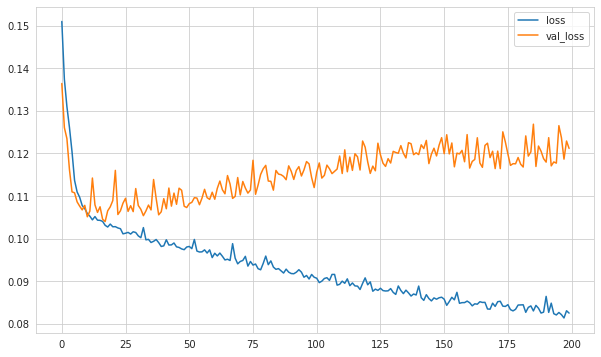

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metric(y_test, y_pred)

r2_score: 0.2796754024983873 
mae: 0.19628647159039975 
mse: 0.11991891866747102 
rmse: 0.34629311091540793


### Add Dropout Layer

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:

model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose = 1)

Epoch 1/100
254/254 [==============================] - 2s 3ms/step - loss: 0.5830 - accuracy: 0.7612 - val_loss: 0.4878 - val_accuracy: 0.8200
Epoch 2/100
254/254 [==============================] - 1s 2ms/step - loss: 0.5213 - accuracy: 0.7946 - val_loss: 0.4695 - val_accuracy: 0.8200
Epoch 3/100
254/254 [==============================] - 1s 2ms/step - loss: 0.5144 - accuracy: 0.7947 - val_loss: 0.4713 - val_accuracy: 0.8200
Epoch 4/100
254/254 [==============================] - 1s 2ms/step - loss: 0.5102 - accuracy: 0.7943 - val_loss: 0.4628 - val_accuracy: 0.8200
Epoch 5/100
254/254 [==============================] - 1s 2ms/step - loss: 0.5069 - accuracy: 0.7941 - val_loss: 0.4608 - val_accuracy: 0.8200
Epoch 6/100
254/254 [==============================] - 1s 2ms/step - loss: 0.5017 - accuracy: 0.7944 - val_loss: 0.4530 - val_accuracy: 0.8200
Epoch 7/100
254/254 [==============================] - 1s 2ms/step - loss: 0.4951 - accuracy: 0.7949 - val_loss: 0.4440 - val_accuracy: 0.8200

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.37769389152526855
accuracy :  0.847000002861023


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[785   4]
 [149  62]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       789
           1       0.94      0.29      0.45       211

    accuracy                           0.85      1000
   macro avg       0.89      0.64      0.68      1000
weighted avg       0.86      0.85      0.81      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, verbose = 1,
          callbacks = [early_stop])

Epoch 1/100
254/254 [==============================] - 1s 3ms/step - loss: 0.5184 - accuracy: 0.7812 - val_loss: 0.4524 - val_accuracy: 0.8200
Epoch 2/100
254/254 [==============================] - 1s 2ms/step - loss: 0.4741 - accuracy: 0.7947 - val_loss: 0.4404 - val_accuracy: 0.8222
Epoch 3/100
254/254 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.7988 - val_loss: 0.4288 - val_accuracy: 0.8233
Epoch 4/100
254/254 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 0.8048 - val_loss: 0.4163 - val_accuracy: 0.8367
Epoch 5/100
254/254 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8093 - val_loss: 0.4145 - val_accuracy: 0.8267
Epoch 6/100
254/254 [==============================] - 1s 2ms/step - loss: 0.4354 - accuracy: 0.8101 - val_loss: 0.4026 - val_accuracy: 0.8389
Epoch 7/100
254/254 [==============================] - 1s 2ms/step - loss: 0.4312 - accuracy: 0.8122 - val_loss: 0.4012 - val_accuracy: 0.8389

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34547796845436096
accuracy :  0.8500000238418579


#### Monitor the "val_recall" as metric

In [ ]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 82, epochs = 100, verbose = 1,
          callbacks = [early_stop])

Epoch 1/100
77/99 [======================>.......] - ETA: 0s - loss: 0.5828 - accuracy: 0.7487

99/99 [==============================] - 2s 10ms/step - loss: 0.5678 - accuracy: 0.7577 - val_loss: 0.4639 - val_accuracy: 0.8200
Epoch 2/100
85/99 [========================>.....] - ETA: 0s - loss: 0.4923 - accuracy: 0.7928

99/99 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7946 - val_loss: 0.4516 - val_accuracy: 0.8200
Epoch 3/100
86/99 [=========================>....] - ETA: 0s - loss: 0.4764 - accuracy: 0.7951

99/99 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7946 - val_loss: 0.4473 - val_accuracy: 0.8200
Epoch 4/100
91/99 [==========================>...] - ETA: 0s - loss: 0.4697 - accuracy: 0.7954

99/99 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7949 - val_loss: 0.4400 - val_accuracy: 0.8222
Epoch 5/100
82/99 [=======================>......] - ETA: 0s - loss: 0.4624 - accuracy: 0.7971

99/99 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7972 - val_loss: 0.4319 - val_accuracy: 0.8233
Epoch 6/100
84/99 [========================>.....] - ETA: 0s - loss: 0.4554 - accuracy: 0.7997

99/99 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8012 - val_loss: 0.4229 - val_accuracy: 0.8278
Epoch 7/100
85/99 [========================>.....] - ETA: 0s - loss: 0.4529 - accuracy: 0.8013

99/99 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8063 - val_loss: 0.4171 - val_accuracy: 0.8256
Epoch 8/100
90/99 [==========================>...] - ETA: 0s - loss: 0.4436 - accuracy: 0.8102

99/99 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8107 - val_loss: 0.4129 - val_accuracy: 0.8289
Epoch 9/100
87/99 [=========================>....] - ETA: 0s - loss: 0.4350 - accuracy: 0.8134

99/99 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8126 - val_loss: 0.4058 - val_accuracy: 0.8378
Epoch 10/100
91/99 [==========================>...] - ETA: 0s - loss: 0.4318 - accuracy: 0.8133

99/99 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8125 - val_loss: 0.4023 - val_accuracy: 0.8356
Epoch 11/100
95/99 [===========================>..] - ETA: 0s - loss: 0.4295 - accuracy: 0.8160

99/99 [==============================] - 0s 3ms/step - loss: 0.4296 - accuracy: 0.8162 - val_loss: 0.3981 - val_accuracy: 0.8356
Epoch 12/100
89/99 [=========================>....] - ETA: 0s - loss: 0.4296 - accuracy: 0.8161

99/99 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8175 - val_loss: 0.3968 - val_accuracy: 0.8367
Epoch 13/100
92/99 [==========================>...] - ETA: 0s - loss: 0.4206 - accuracy: 0.8176

99/99 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8167 - val_loss: 0.3933 - val_accuracy: 0.8378
Epoch 14/100
88/99 [=========================>....] - ETA: 0s - loss: 0.4213 - accuracy: 0.8183

99/99 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8195 - val_loss: 0.3890 - val_accuracy: 0.8422
Epoch 15/100
90/99 [==========================>...] - ETA: 0s - loss: 0.4130 - accuracy: 0.8224

99/99 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8228 - val_loss: 0.3812 - val_accuracy: 0.8400
Epoch 16/100
85/99 [========================>.....] - ETA: 0s - loss: 0.4096 - accuracy: 0.8248

99/99 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8240 - val_loss: 0.3761 - val_accuracy: 0.8422
Epoch 17/100
82/99 [=======================>......] - ETA: 0s - loss: 0.4067 - accuracy: 0.8242

99/99 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8267 - val_loss: 0.3715 - val_accuracy: 0.8489
Epoch 18/100
81/99 [=======================>......] - ETA: 0s - loss: 0.3962 - accuracy: 0.8293

99/99 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8294 - val_loss: 0.3702 - val_accuracy: 0.8433
Epoch 19/100
86/99 [=========================>....] - ETA: 0s - loss: 0.3907 - accuracy: 0.8308

99/99 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8310 - val_loss: 0.3648 - val_accuracy: 0.8489
Epoch 20/100
85/99 [========================>.....] - ETA: 0s - loss: 0.3823 - accuracy: 0.8367

99/99 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8343 - val_loss: 0.3540 - val_accuracy: 0.8600
Epoch 21/100
89/99 [=========================>....] - ETA: 0s - loss: 0.3750 - accuracy: 0.8383

99/99 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8383 - val_loss: 0.3485 - val_accuracy: 0.8578
Epoch 22/100
85/99 [========================>.....] - ETA: 0s - loss: 0.3676 - accuracy: 0.8451

99/99 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8433 - val_loss: 0.3445 - val_accuracy: 0.8600
Epoch 23/100
83/99 [========================>.....] - ETA: 0s - loss: 0.3666 - accuracy: 0.8437

99/99 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8454 - val_loss: 0.3424 - val_accuracy: 0.8611
Epoch 24/100
80/99 [=======================>......] - ETA: 0s - loss: 0.3651 - accuracy: 0.8454

99/99 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8475 - val_loss: 0.3417 - val_accuracy: 0.8611
Epoch 25/100
81/99 [=======================>......] - ETA: 0s - loss: 0.3581 - accuracy: 0.8475

99/99 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8475 - val_loss: 0.3382 - val_accuracy: 0.8644
Epoch 26/100
85/99 [========================>.....] - ETA: 0s - loss: 0.3574 - accuracy: 0.8518

99/99 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8512 - val_loss: 0.3373 - val_accuracy: 0.8611
Epoch 27/100
81/99 [=======================>......] - ETA: 0s - loss: 0.3561 - accuracy: 0.8499

99/99 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8509 - val_loss: 0.3349 - val_accuracy: 0.8667
Epoch 28/100
87/99 [=========================>....] - ETA: 0s - loss: 0.3562 - accuracy: 0.8496

99/99 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8509 - val_loss: 0.3349 - val_accuracy: 0.8700
Epoch 29/100
86/99 [=========================>....] - ETA: 0s - loss: 0.3518 - accuracy: 0.8518

99/99 [==============================] - 0s 2ms/step - loss: 0.3530 - accuracy: 0.8509 - val_loss: 0.3320 - val_accuracy: 0.8711
Epoch 30/100
89/99 [=========================>....] - ETA: 0s - loss: 0.3477 - accuracy: 0.8523

99/99 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.8506 - val_loss: 0.3415 - val_accuracy: 0.8656
Epoch 31/100
85/99 [========================>.....] - ETA: 0s - loss: 0.3466 - accuracy: 0.8575

99/99 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8570 - val_loss: 0.3327 - val_accuracy: 0.8711
Epoch 32/100
85/99 [========================>.....] - ETA: 0s - loss: 0.3498 - accuracy: 0.8554

99/99 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8563 - val_loss: 0.3315 - val_accuracy: 0.8733
Epoch 33/100
84/99 [========================>.....] - ETA: 0s - loss: 0.3397 - accuracy: 0.8573

99/99 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8530 - val_loss: 0.3355 - val_accuracy: 0.8678
Epoch 34/100
87/99 [=========================>....] - ETA: 0s - loss: 0.3475 - accuracy: 0.8518

99/99 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8535 - val_loss: 0.3326 - val_accuracy: 0.8744
Epoch 35/100
85/99 [========================>.....] - ETA: 0s - loss: 0.3459 - accuracy: 0.8549

99/99 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8544 - val_loss: 0.3315 - val_accuracy: 0.8711
Epoch 36/100
82/99 [=======================>......] - ETA: 0s - loss: 0.3478 - accuracy: 0.8535

99/99 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8559 - val_loss: 0.3358 - val_accuracy: 0.8722
Epoch 37/100
83/99 [========================>.....] - ETA: 0s - loss: 0.3421 - accuracy: 0.8595

99/99 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8574 - val_loss: 0.3315 - val_accuracy: 0.8700
Epoch 38/100
86/99 [=========================>....] - ETA: 0s - loss: 0.3470 - accuracy: 0.8561

99/99 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8568 - val_loss: 0.3337 - val_accuracy: 0.8689
Epoch 39/100
89/99 [=========================>....] - ETA: 0s - loss: 0.3442 - accuracy: 0.8560

99/99 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8557 - val_loss: 0.3314 - val_accuracy: 0.8700
Epoch 40/100
80/99 [=======================>......] - ETA: 0s - loss: 0.3473 - accuracy: 0.8541

99/99 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8568 - val_loss: 0.3334 - val_accuracy: 0.8722
Epoch 41/100
90/99 [==========================>...] - ETA: 0s - loss: 0.3369 - accuracy: 0.8589

99/99 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8567 - val_loss: 0.3344 - val_accuracy: 0.8678
Epoch 42/100
84/99 [========================>.....] - ETA: 0s - loss: 0.3381 - accuracy: 0.8609

99/99 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8584 - val_loss: 0.3318 - val_accuracy: 0.8722
Epoch 43/100
87/99 [=========================>....] - ETA: 0s - loss: 0.3442 - accuracy: 0.8559

99/99 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8567 - val_loss: 0.3311 - val_accuracy: 0.8711
Epoch 44/100
83/99 [========================>.....] - ETA: 0s - loss: 0.3422 - accuracy: 0.8582

99/99 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8594 - val_loss: 0.3315 - val_accuracy: 0.8667
Epoch 45/100
89/99 [=========================>....] - ETA: 0s - loss: 0.3347 - accuracy: 0.8574

99/99 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8557 - val_loss: 0.3341 - val_accuracy: 0.8656
Epoch 46/100
82/99 [=======================>......] - ETA: 0s - loss: 0.3414 - accuracy: 0.8581

99/99 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8589 - val_loss: 0.3297 - val_accuracy: 0.8678
Epoch 47/100
82/99 [=======================>......] - ETA: 0s - loss: 0.3436 - accuracy: 0.8546

99/99 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8558 - val_loss: 0.3319 - val_accuracy: 0.8633
Epoch 48/100
83/99 [========================>.....] - ETA: 0s - loss: 0.3417 - accuracy: 0.8609

99/99 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8595 - val_loss: 0.3344 - val_accuracy: 0.8689
Epoch 49/100
84/99 [========================>.....] - ETA: 0s - loss: 0.3447 - accuracy: 0.8564

99/99 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8586 - val_loss: 0.3316 - val_accuracy: 0.8678
Epoch 50/100
79/99 [======================>.......] - ETA: 0s - loss: 0.3391 - accuracy: 0.8592

99/99 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8604 - val_loss: 0.3356 - val_accuracy: 0.8689
Epoch 51/100
88/99 [=========================>....] - ETA: 0s - loss: 0.3391 - accuracy: 0.8607

99/99 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8593 - val_loss: 0.3309 - val_accuracy: 0.8667
Epoch 52/100
88/99 [=========================>....] - ETA: 0s - loss: 0.3435 - accuracy: 0.8570

99/99 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8598 - val_loss: 0.3298 - val_accuracy: 0.8656
Epoch 53/100
89/99 [=========================>....] - ETA: 0s - loss: 0.3380 - accuracy: 0.8601

99/99 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8601 - val_loss: 0.3300 - val_accuracy: 0.8678
Epoch 54/100
88/99 [=========================>....] - ETA: 0s - loss: 0.3318 - accuracy: 0.8654

99/99 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8628 - val_loss: 0.3343 - val_accuracy: 0.8600
Epoch 55/100
93/99 [===========================>..] - ETA: 0s - loss: 0.3409 - accuracy: 0.8596

99/99 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.8595 - val_loss: 0.3347 - val_accuracy: 0.8722
Epoch 56/100
90/99 [==========================>...] - ETA: 0s - loss: 0.3376 - accuracy: 0.8599

99/99 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8598 - val_loss: 0.3297 - val_accuracy: 0.8689
Epoch 57/100
88/99 [=========================>....] - ETA: 0s - loss: 0.3356 - accuracy: 0.8624

99/99 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8614 - val_loss: 0.3319 - val_accuracy: 0.8700
Epoch 58/100
90/99 [==========================>...] - ETA: 0s - loss: 0.3381 - accuracy: 0.8600

99/99 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8602 - val_loss: 0.3300 - val_accuracy: 0.8711
Epoch 59/100
86/99 [=========================>....] - ETA: 0s - loss: 0.3395 - accuracy: 0.8626

99/99 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8631 - val_loss: 0.3298 - val_accuracy: 0.8700
Epoch 60/100
77/99 [======================>.......] - ETA: 0s - loss: 0.3369 - accuracy: 0.8617

99/99 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8612 - val_loss: 0.3299 - val_accuracy: 0.8689
Epoch 61/100
85/99 [========================>.....] - ETA: 0s - loss: 0.3340 - accuracy: 0.8631

99/99 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8616 - val_loss: 0.3334 - val_accuracy: 0.8633
Epoch 62/100
90/99 [==========================>...] - ETA: 0s - loss: 0.3377 - accuracy: 0.8627

99/99 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8628 - val_loss: 0.3300 - val_accuracy: 0.8611
Epoch 63/100
90/99 [==========================>...] - ETA: 0s - loss: 0.3346 - accuracy: 0.8622

99/99 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8616 - val_loss: 0.3313 - val_accuracy: 0.8667
Epoch 64/100
78/99 [======================>.......] - ETA: 0s - loss: 0.3355 - accuracy: 0.8641

99/99 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8623 - val_loss: 0.3340 - val_accuracy: 0.8656
Epoch 65/100
83/99 [========================>.....] - ETA: 0s - loss: 0.3359 - accuracy: 0.8612

99/99 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8610 - val_loss: 0.3287 - val_accuracy: 0.8667
Epoch 66/100
84/99 [========================>.....] - ETA: 0s - loss: 0.3384 - accuracy: 0.8598

99/99 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8621 - val_loss: 0.3299 - val_accuracy: 0.8667
Epoch 67/100
88/99 [=========================>....] - ETA: 0s - loss: 0.3367 - accuracy: 0.8618

99/99 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8630 - val_loss: 0.3326 - val_accuracy: 0.8711
Epoch 68/100
78/99 [======================>.......] - ETA: 0s - loss: 0.3372 - accuracy: 0.8627

99/99 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8635 - val_loss: 0.3300 - val_accuracy: 0.8644
Epoch 69/100
85/99 [========================>.....] - ETA: 0s - loss: 0.3339 - accuracy: 0.8620

99/99 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8628 - val_loss: 0.3291 - val_accuracy: 0.8700
Epoch 70/100
90/99 [==========================>...] - ETA: 0s - loss: 0.3373 - accuracy: 0.8599

99/99 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8616 - val_loss: 0.3304 - val_accuracy: 0.8700
Epoch 71/100
86/99 [=========================>....] - ETA: 0s - loss: 0.3346 - accuracy: 0.8639

99/99 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8636 - val_loss: 0.3285 - val_accuracy: 0.8678
Epoch 72/100
84/99 [========================>.....] - ETA: 0s - loss: 0.3355 - accuracy: 0.8619

99/99 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8614 - val_loss: 0.3299 - val_accuracy: 0.8644
Epoch 73/100
83/99 [========================>.....] - ETA: 0s - loss: 0.3344 - accuracy: 0.8632

99/99 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8633 - val_loss: 0.3299 - val_accuracy: 0.8700
Epoch 74/100
86/99 [=========================>....] - ETA: 0s - loss: 0.3312 - accuracy: 0.8639

99/99 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8637 - val_loss: 0.3333 - val_accuracy: 0.8644
Epoch 75/100
87/99 [=========================>....] - ETA: 0s - loss: 0.3368 - accuracy: 0.8600

99/99 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8616 - val_loss: 0.3296 - val_accuracy: 0.8678
Epoch 76/100
89/99 [=========================>....] - ETA: 0s - loss: 0.3337 - accuracy: 0.8627

99/99 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8631 - val_loss: 0.3287 - val_accuracy: 0.8644
Epoch 77/100
79/99 [======================>.......] - ETA: 0s - loss: 0.3293 - accuracy: 0.8674

99/99 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8635 - val_loss: 0.3276 - val_accuracy: 0.8656
Epoch 78/100
74/99 [=====================>........] - ETA: 0s - loss: 0.3304 - accuracy: 0.8644

99/99 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8641 - val_loss: 0.3280 - val_accuracy: 0.8656
Epoch 79/100
79/99 [======================>.......] - ETA: 0s - loss: 0.3341 - accuracy: 0.8631

99/99 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8648 - val_loss: 0.3282 - val_accuracy: 0.8689
Epoch 80/100
88/99 [=========================>....] - ETA: 0s - loss: 0.3352 - accuracy: 0.8636

99/99 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8647 - val_loss: 0.3297 - val_accuracy: 0.8633
Epoch 81/100
76/99 [======================>.......] - ETA: 0s - loss: 0.3353 - accuracy: 0.8618

99/99 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8626 - val_loss: 0.3274 - val_accuracy: 0.8678
Epoch 82/100
83/99 [========================>.....] - ETA: 0s - loss: 0.3300 - accuracy: 0.8667

99/99 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8646 - val_loss: 0.3304 - val_accuracy: 0.8667
Epoch 83/100
85/99 [========================>.....] - ETA: 0s - loss: 0.3319 - accuracy: 0.8638

99/99 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8622 - val_loss: 0.3325 - val_accuracy: 0.8644
Epoch 84/100
87/99 [=========================>....] - ETA: 0s - loss: 0.3346 - accuracy: 0.8636

99/99 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8632 - val_loss: 0.3309 - val_accuracy: 0.8600
Epoch 85/100
89/99 [=========================>....] - ETA: 0s - loss: 0.3314 - accuracy: 0.8650

99/99 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8644 - val_loss: 0.3288 - val_accuracy: 0.8700
Epoch 86/100
86/99 [=========================>....] - ETA: 0s - loss: 0.3332 - accuracy: 0.8639

99/99 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8648 - val_loss: 0.3288 - val_accuracy: 0.8644
Epoch 87/100
87/99 [=========================>....] - ETA: 0s - loss: 0.3308 - accuracy: 0.8635

99/99 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8630 - val_loss: 0.3276 - val_accuracy: 0.8678
Epoch 88/100
88/99 [=========================>....] - ETA: 0s - loss: 0.3331 - accuracy: 0.8652

99/99 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8648 - val_loss: 0.3292 - val_accuracy: 0.8656
Epoch 89/100
90/99 [==========================>...] - ETA: 0s - loss: 0.3297 - accuracy: 0.8648

99/99 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8643 - val_loss: 0.3301 - val_accuracy: 0.8700
Epoch 90/100
77/99 [======================>.......] - ETA: 0s - loss: 0.3386 - accuracy: 0.8568

99/99 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8612 - val_loss: 0.3315 - val_accuracy: 0.8656
Epoch 91/100
79/99 [======================>.......] - ETA: 0s - loss: 0.3361 - accuracy: 0.8617

99/99 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8640 - val_loss: 0.3304 - val_accuracy: 0.8667
Epoch 92/100
80/99 [=======================>......] - ETA: 0s - loss: 0.3247 - accuracy: 0.8675

99/99 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8651 - val_loss: 0.3274 - val_accuracy: 0.8644
Epoch 93/100
90/99 [==========================>...] - ETA: 0s - loss: 0.3315 - accuracy: 0.8633

99/99 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8647 - val_loss: 0.3284 - val_accuracy: 0.8644
Epoch 94/100
84/99 [========================>.....] - ETA: 0s - loss: 0.3278 - accuracy: 0.8651

99/99 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8646 - val_loss: 0.3281 - val_accuracy: 0.8667
Epoch 95/100
82/99 [=======================>......] - ETA: 0s - loss: 0.3361 - accuracy: 0.8615

99/99 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8637 - val_loss: 0.3307 - val_accuracy: 0.8656
Epoch 96/100
79/99 [======================>.......] - ETA: 0s - loss: 0.3279 - accuracy: 0.8635

99/99 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8651 - val_loss: 0.3275 - val_accuracy: 0.8644
Epoch 97/100
86/99 [=========================>....] - ETA: 0s - loss: 0.3273 - accuracy: 0.8654

99/99 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8651 - val_loss: 0.3406 - val_accuracy: 0.8700
Epoch 98/100
88/99 [=========================>....] - ETA: 0s - loss: 0.3296 - accuracy: 0.8657

99/99 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8646 - val_loss: 0.3296 - val_accuracy: 0.8633
Epoch 99/100
75/99 [=====================>........] - ETA: 0s - loss: 0.3303 - accuracy: 0.8633

99/99 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8632 - val_loss: 0.3313 - val_accuracy: 0.8689
Epoch 100/100
89/99 [=========================>....] - ETA: 0s - loss: 0.3266 - accuracy: 0.8678

99/99 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8662 - val_loss: 0.3344 - val_accuracy: 0.8678


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.35811367630958557
accuracy :  0.8429999947547913


## GridSearchCV

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
seed = 42

In [ ]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 150)

parameters = {'batch_size': [64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.002, 0.003]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Epoch 1/150
127/127 [==============================] - 1s 3ms/step - loss: 0.5114 - accuracy: 0.7870 - val_loss: 0.4428 - val_accuracy: 0.8200
Epoch 2/150
127/127 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.7999 - val_loss: 0.4176 - val_accuracy: 0.8278
Epoch 3/150
127/127 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8117 - val_loss: 0.4017 - val_accuracy: 0.8367
Epoch 4/150
127/127 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8165 - val_loss: 0.3947 - val_accuracy: 0.8378
Epoch 5/150
127/127 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8249 - val_loss: 0.4003 - val_accuracy: 0.8356
Epoch 6/150
127/127 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8306 - val_loss: 0.3901 - val_accuracy: 0.8411
Epoch 7/150
127/127 [==============================] - 0s 2ms/step - loss: 0.4122

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f58d4cc9fd0>,
             n_jobs=-1,
             param_grid={'batch_size': [64], 'learn_rate': [0.002, 0.003],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
grid_model.best_score_

0.859

In [ ]:

grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
4,0.859,0.009,1,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
7,0.859,0.010,2,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
0,0.859,0.008,3,"{'batch_size': 64, 'learn_rate': 0.002, 'optim..."
1,0.858,0.010,4,"{'batch_size': 64, 'learn_rate': 0.002, 'optim..."
5,0.857,0.006,5,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
3,0.856,0.007,6,"{'batch_size': 64, 'learn_rate': 0.002, 'optim..."
2,0.797,0.012,7,"{'batch_size': 64, 'learn_rate': 0.002, 'optim..."
6,0.797,0.012,7,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."


In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[753  36]
 [113  98]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       789
           1       0.73      0.46      0.57       211

    accuracy                           0.85      1000
   macro avg       0.80      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



In [ ]:
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve

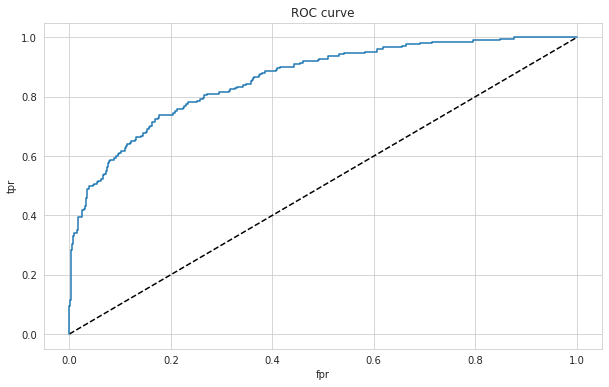

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.8598501913154213

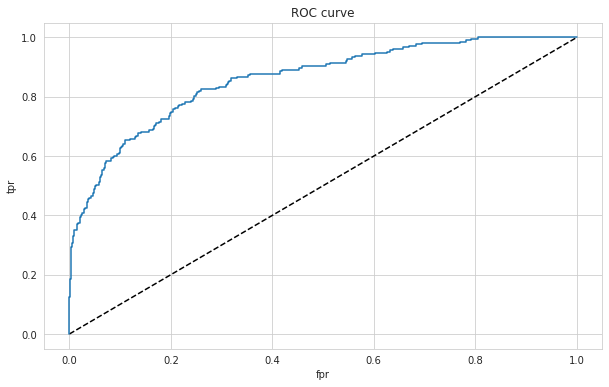

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

0.8594116975714655

In [ ]:
tf.random.set_seed(42)

model_final = Sequential()

model_final.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model_final.add(Dense(16, activation = "relu"))
model_final.add(Dense(8, activation = "relu"))
model_final.add(Dense(1, activation = "sigmoid"))
opt = RMSprop(lr = 0.003)
model_final.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
model_final.fit(x = X, y = y, validation_split = 0.1, batch_size = 32, epochs = 100, verbose = 1,
          callbacks = [early_stop])

Epoch 1/100
282/282 [==============================] - 1s 3ms/step - loss: 0.4809 - accuracy: 0.7922 - val_loss: 0.4545 - val_accuracy: 0.8160
Epoch 2/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4476 - accuracy: 0.8047 - val_loss: 0.4352 - val_accuracy: 0.8140
Epoch 3/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4336 - accuracy: 0.8127 - val_loss: 0.4943 - val_accuracy: 0.7700
Epoch 4/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4228 - accuracy: 0.8168 - val_loss: 0.4221 - val_accuracy: 0.8170
Epoch 5/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4093 - accuracy: 0.8264 - val_loss: 0.4239 - val_accuracy: 0.8200
Epoch 6/100
282/282 [==============================] - 1s 2ms/step - loss: 0.3860 - accuracy: 0.8348 - val_loss: 0.3725 - val_accuracy: 0.8500
Epoch 7/100
282/282 [==============================] - 1s 2ms/step - loss: 0.3655 - accuracy: 0.8463 - val_loss: 0.3667 - val_accuracy: 0.8470

In [ ]:
model_final.evaluate(X_test, y_test, verbose=0)

[0.32096052169799805, 0.8669999837875366]

In [ ]:
y_pred = model_final.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[767  22]
 [111 100]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       789
           1       0.82      0.47      0.60       211

    accuracy                           0.87      1000
   macro avg       0.85      0.72      0.76      1000
weighted avg       0.86      0.87      0.85      1000



# Final Model and Model Deployment

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X)

MinMaxScaler()

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [ ]:

model_final.save('model_churn.h5')

## Prediction

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:

model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [ ]:
X

array([[0.538     , 0.32432432, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , ..., 1.        , 1.        ,
        0.        ],
       [0.304     , 0.32432432, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 1.        ,
        0.        ],
       [0.844     , 0.32432432, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.884     , 0.13513514, 0.4       , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
df.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6323,550,France,Male,34,8,122359.500,1,0,0,116495.550,0


In [ ]:
df_dummy.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204,0.501,0.251,0.248,0.454,0.546
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403,0.500,0.434,0.432,0.498,0.498
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000,0.000,0.000,0.000,0.000,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000,0.000,0.000,0.000,0.000,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000,1.000,0.000,0.000,0.000,1.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000,1.000,1.000,0.000,1.000,1.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
my_dict = {
    'CreditScore':520,
    'Geography':'France',
    'Gender': 'Female',
    'Age': 48,
    'Tenure' : 8,
    'Balance' : 150000.00,
    'NumOfProducts': 2,
    'HasCrCard' : 1,
    'IsActiveMember': 0,
    'EstimatedSalary': 55000.00
}

In [ ]:
df_ex = pd.DataFrame(my_dict, index = [1])
df_ex

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,520,France,Female,48,8,150000.000,2,1,0,55000.000


In [ ]:
df_ex_dummy = pd.get_dummies(df_ex).reindex(columns=df_dummy.drop('Exited',axis=1).columns, fill_value=0)
df_ex_dummy

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1,520,48,8,150000.000,2,1,0,55000.000,1,0,0,1,0


In [ ]:
(model_churn.predict(df_ex_dummy) > 0.5).astype("int32")

array([[1]], dtype=int32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___